## To use this slideshow:
- Run All, using the menu item: Kernel/Restart & Run All
- Return to this top cell
- click on "Slideshow" menu item above, that looks like this:
![](images/SlideIcon.png)

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h1 align='center'>The Unfair Dice Problem</h1>

<h3 align='center'>Laura Gutierrez Funderburk, Cybera Inc. </h3>

<h3 align='center'>Michael Lamoureux, University of Calgary </h3>

<h4 align='center'>Joint work with Richard Hoshino, Northeastern University </h4>

<h2 align='center'> About the Callysto Program</h2>

- Provide open educational infrastructure and learning resources
- Focus on making computational thinking and data science/literacy available
- Use Jupyter notebooks as main platform
- Host teacher and student training workshops

<h3 align='center'>Brought to you by</h3>


| | | |
|-|-|-|
|<img src="./images/Cybera_Logo_RBG_Colour.png" alt="Drawing" width=400px;/>|<img src="./images/PIMS_Logos_Web_PIMS_Logo_Colour.png" alt="Drawing" width = 400px;/>| <img src="./images/With_Funding_Canada_Wordmark-colour_BIL-EN.png" alt="Drawing" width=400px;/>|

<h2 align='center'>What is a Jupyter notebook?</h2>

A Jupyter notebook is an application that can include both text and (Python) code in different “cells” or parts of the document.

Through the Callysto Hub you can execute code and share notebooks without installing software and dependencies. 

Jupyter notebooks are widely used within data science to perform analysis and communicate results.


<h2 align='center'>Callysto provides Jupyter notebooks exploring various subjects</h2>


|[callysto.ca](https://www.callysto.ca/) |
|-|
|<img src="./images/CallystoResources.png" alt="Drawing" width=1000px;/>|

<h2 align='center'>Motivation</h2>

How do small advantages, repeated over time, contribute to the success of an individual?

Does this make a difference in what we see as fairness, or justice, in real life?

Can we make a simulation of this, and explore any remediations?

<h2 align='center'>Example: Socio-economic status</h2>

Two students, student A and student B are both going to the same university.

Suppose student A receives financial support, lives close to campus, has a car, doesn't need a job for support.



Suppose student B on the other hand does not have as many resources, lives far from campus, takes transit, has a part-time job and student loans for tuition.



How does this impact their trajectories over time?

<h2 align='center'>Another example: career advancement</h2>

Two candidates, candidate A and candidate B are both applying for the same job. Suppose both have comparable experience. 

Suppose candidate A's background is more relatable to the hiring managers. Both the candidate and the team find it easy to relate to one another. 


Suppose candidate B's background is foreign to the hiring managers. It takes more work both from the candidate and the hiring team to relate to one another.

How does this impact which candidate is invited to the interview, selected for a job, or promoted throughout their career trajectories over time?

<h2 align='center'>Can we use mathematics and code to simulate this kind of situation?</h2>


<h2 align='center'>How can we communicate these types of situations to students in a constructive way?</h2>


<h2 align='center'>Let's simplify the situation with a game of dice.</h2>

<img align='center' src="./images/twodice6401.jpg" alt="Drawing" style="width: 450px;"/>

Student A and student B each roll a die. The one with a bigger number wins. Ties go to A. 

Starting with ten dollars each, at each roll the winner takes a dollar from the loser. 

Let's play. Play until someone runs out of money. 

<h2 align='center'>Let's play</h2>


In [11]:
import random
def roll_dice_two_players():
    major_die = random.choice([1,2,3,4,5,6])
    minor_die = random.choice([1,2,3,4,5,6])
    
    print("A rolls ",major_die, "and B rolls", minor_die,".")
    return (major_die >= minor_die)


In [2]:
from ipywidgets import widgets,Layout,Button,VBox,HBox
from IPython.display import display, Javascript, Markdown, HTML, clear_output
import pandas as pd

## We store the game results in a data frame, for convenience

df = pd.DataFrame({"A's Points": [ 0 for i in range(11)],
                  "B's Points": [ 0 for i in range(11)]},
                  index=[i for i in range(11)])
df.loc[0, "A's Points"] = 10
df.loc[0, "B's Points"] = 10

## We make a couple of buttons to roll the dice, and reset the game
style = {'description_width': 'initial'}

# Button widget
play_button = widgets.Button(
    button_style='success',
    description="Roll the dice", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

# Button widget
reset_button = widgets.Button(
    button_style='danger',
    description="Reset the game", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

turn_n = 0

def play_action(b):
    global turn_n
    clear_output()
    display(tab2)
    turn_n += 1
    if (turn_n>10):
        print("Game over! Who won this round?")
        display(df[0:11])
    else:
        print("Turn #",turn_n)
        if roll_dice_two_players():
            print("A wins this roll. A gets one point from B.")
            df.loc[turn_n, "A's Points"] = df.loc[turn_n-1,"A's Points"] +1
            df.loc[turn_n, "B's Points"] = df.loc[turn_n-1,"B's Points"]-1 
        else:
            print("B wins this roll. B gets one point from A.")
            df.loc[turn_n, "A's Points"] = df.loc[turn_n-1,"A's Points"] -1
            df.loc[turn_n, "B's Points"] = df.loc[turn_n-1,"B's Points"]+1 
        display(df[0:turn_n+1])
  
def reset_action(b):
    global turn_n
    clear_output()
    display(tab2)
    print("A and V start with ten points each.")
    display(df[0:1])
    turn_n=0
    
    
play_button.on_click( play_action )
reset_button.on_click( reset_action )

tab1 = HBox(children=[play_button,reset_button])
tab2 = widgets.Tab(children=[tab1])
tab2.set_title(0, 'Play')


# Connect widget to function - run subsequent cells


In [12]:
display(tab2)
print("A and B start with ten points each.")
display(df[0:1])

Turn # 10
A rolls  2 and B rolls 5 .
B wins this roll. B gets one point from A.


,A's Points,B's Points
0,10,10
1,11,9
2,12,8
3,13,7
4,14,6
5,15,5
6,16,4
7,15,5
8,14,6
9,15,5


<h2 align='center'>Let's Try Again....</h2>

B is losing the ties! So let's make things more fair, give B two dollars when B wins.

In [4]:
## re-use the same data frame
df.loc[0, "A's Points"] = 10
df.loc[0, "B's Points"] = 10

## We make a couple of buttons to roll the dice, and reset the game
style = {'description_width': 'initial'}

# Button widget
play_button2 = widgets.Button(
    button_style='success',
    description="Roll the dice", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

# Button widget
reset_button2 = widgets.Button(
    button_style='danger',
    description="Reset the game", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

turn2 = 0

def play_action2(b):
    global turn2
    clear_output()
    display(tab4)
    turn2 += 1
    if (turn2>10):
        print("Game over! Who won this round?")
        display(df[0:11])
    else:
        print("Turn #",turn2)
        if roll_dice_two_players():
            print("A wins this roll. A gets one point from B.")
            df.loc[turn2, "A's Points"] = df.loc[turn2-1,"A's Points"] +1
            df.loc[turn2, "B's Points"] = df.loc[turn2-1,"B's Points"]-1 
        else:
            print("B wins this roll. B gets two points from A.")
            df.loc[turn2, "A's Points"] = df.loc[turn2-1,"A's Points"] -2
            df.loc[turn2, "B's Points"] = df.loc[turn2-1,"B's Points"]+2 
        display(df[0:turn2+1])
  
def reset_action2(b):
    global turn2
    clear_output()
    display(tab4)
    print("A and B start with ten points each.")
    display(df[0:1])
    turn2=0
    
    
play_button2.on_click( play_action2 )
reset_button2.on_click( reset_action2 )

tab3 = HBox(children=[play_button2,reset_button2])
tab4 = widgets.Tab(children=[tab3])
tab4.set_title(0, 'Play')



In [13]:
display(tab4)
print("A and B start with ten points each.")
display(df[0:1])

Turn # 10
A rolls  2 and B rolls 6 .
B wins this roll. B gets two points from A.


,A's Points,B's Points
0,10,10
1,8,12
2,6,14
3,4,16
4,2,18
5,3,17
6,4,16
7,5,15
8,3,17
9,1,19


<h2 align='center'>In class: Let's Play</h2>

Break up the students into groups of two (A and B).

Give each student ten candies, and a die. Have them roll the dice, and trade candy until someone runs out.

Count up how many people in group A won all the candy? How many people in group B won them all?

Is this fair?

<h2 align='center'>In an online class: Let's Play</h2>

Using Jupyter notebooks to have students play online. 

- We will use this link https://tinyurl.com/virtual-dice (also posted in the comments)

- People will be broken into groups using Zoom breakout rooms

- Within each group, members decide who shares their screen and run the notebook

- Use the notebook to simulate Bob and Alice playing the game

- Run through the notebook within your group

<h2 align='center'>What makes this game unfair?</h2>

<center><img src="./images/SampleSpace.png" alt="Drawing" style="width: 450px;"/></center>


<h2 align='center'>What makes this game unfair?</h2>

Below is the sample space of our game. B's die outcome (black column) is subtracted from B's die outcome (dark red row). 

A wins whenever the result is 0 or more. B wins whenever the result is negative. 

The probability A will win is $$P(A) = \frac{21}{36}$$

while the probability B will win is $$P(B) = \frac{15}{36}$$

In the first game, the expected per-round payoff for A is $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-1) = \frac{1}{6}.$$  

So after about 60 rounds of play, A would be "expected" to have all of the toothpicks.  


Conversely, in the second game, the expected per-round payoff for A is  $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-2) = \frac{-1}{4}.$$  


So after about 40 rounds of play, B would be "expected" to have all of the toothpicks.

<h2 align='center'>What can be done to balance this situation?</h2>

The original game resulted in an unfair scenario for B.

Giving B two points instead of one resulted in an unfair scenario for A. 

How can we find a solution to this problem?

<h2 align='center'>Simulating the Game</h2>

Let's use some code to simulate many trials of this unfair game.

Try making it more fair. Change the starting points, or the payoffs.


In [6]:
import random

import matplotlib.patches as mpatches
from ipywidgets import interact, interact_manual, widgets, Layout, VBox, HBox, Button
from IPython.display import display, Javascript, Markdown, HTML, clear_output
import matplotlib.pyplot as plt



#def runN_cell( b ):    
#    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))    

    
#def rerun_cell( b ):    
#    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+1)'))    


In [7]:
### This cell contains code to simulate our game

def roll_dice():
    
    """This function simulates rolling two dice 
    and substracting the minor die outcome from the major die outcome"""
    major_die = random.choice([1,2,3,4,5,6])
    minor_die = random.choice([1,2,3,4,5,6])
    
    if major_die >= minor_die:
        return True
    else:
        return False

def play_game(StartValue_A, StartValue_B, p, q):
    
    """This function implements two players engaging in the game"""
        
    # Initialize variables
    # Set value A to starting value, resp value C
    value_A = StartValue_A
    value_B = StartValue_B 
    turn_number = 0
    # Store points on each turn
    CurrentValue_A = []
    CurrentValue_B = []
    # Initialize winners
    winner_A = 0
    winner_B = 0
    
    # We want to continue playing as long as both players have at least one more point
    while value_A > 0 and value_B > 0:
        # Increase turn
        turn_number += 1
        
        # If major die >=  minor die 
        if roll_dice():
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            
            # Give A one more (set of) point(s) 
            value_A = value_A + p
            # Remove the same quantity from B 
            value_B = value_B - p
            
        # Otherwise, we have major die < minor die 
        else:
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            # Give B one more (set of) points 
            value_B = value_B + q
            # Remove the same quantity from A
            value_A = value_A - q
            
    # Get winners
    # If A has zero or less points, B is the winner
    if value_A <= 0: winner_B = 1
    # Otherwise, A is the winner 
    if value_B <= 0: winner_A = 1
    
    return [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B]
    
    

def plot_game(StartValue_A, StartValue_B, p, q):
    
    """This function simulates the game for a given 1000 trials and prints 
    the average number of times A and B win"""
    # Suppose we set 1000 trials
    n = 1000
   
    # Initialize variables
    wins_for_A = 0
    wins_for_B = 0
    total_moves = 0   
    
    # Iterate over the total number of trials, and repeat game
    for i in range(n):  
        [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B] = play_game(StartValue_A, StartValue_B, p, q)
        # Add number of turns
        total_moves += turn_number
        # Add total number of times A won
        wins_for_A += winner_A
        # Add total number of times B won  
        wins_for_B += winner_B
    
    print("The average number of rounds is", total_moves/n)
    print("A wins", round(100*wins_for_A/n,2), "% of the time")
    print("B wins", round(100*wins_for_B/n,2), "% of the time")
    
    # Plot results
    # Set x axis values
    x_co = [i for i in range(len(CurrentValue_A))]
    # Initialize figure and set x, y limits
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_xlim([0,len(x_co) + 1])
    ax.set_ylim([0,StartValue_A+StartValue_B])
    ax.grid(True) 
    # Plot points for A and B at each turn
    ax.plot(x_co,CurrentValue_A,label="A",c='r')
    ax.plot(x_co,CurrentValue_B,label="B",c='black')
    # Add labels, title and legend to improve readability
    ax.set_ylabel("Number of points",fontsize=25)
    ax.set_xlabel("Number of turns",fontsize=25)
    ax.set_title("A Typical Game",fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
    plt.show()

In [8]:
# Create interactive menu with parameters

style = {'description_width': 'initial'}

all_the_widgets = [widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='A: Initial Points:',
            disabled=False,style =style), widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='B:Initial Points:',
            disabled=False,style =style), widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points for A win',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style),widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points for B win',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style)]


# Button widget
CD_button = widgets.Button(
    button_style='success',
    description="Run Simulations", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    

def draw_results(b):
    StartValue_A = all_the_widgets[0].value
    StartValue_B = all_the_widgets[1].value
    p = all_the_widgets[2].value
    q = all_the_widgets[3].value
    clear_output()
    display(tab)  ## Have to redraw the widgets
    plot_game(StartValue_A, StartValue_B, p, q)

# Connect widget to function - run subsequent cells
#CD_button.on_click( runN_cell )
CD_button.on_click( draw_results )

# user menu using categories found above
tab3 = VBox(children=[HBox(children=all_the_widgets[0:2]),HBox(children=all_the_widgets[2:4]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Choose Parameters')
# display(tab)   ## We will display in the next cell. So SlideShow works. 

The average number of rounds is 7172.755
A wins 49.6 % of the time
B wins 50.4 % of the time


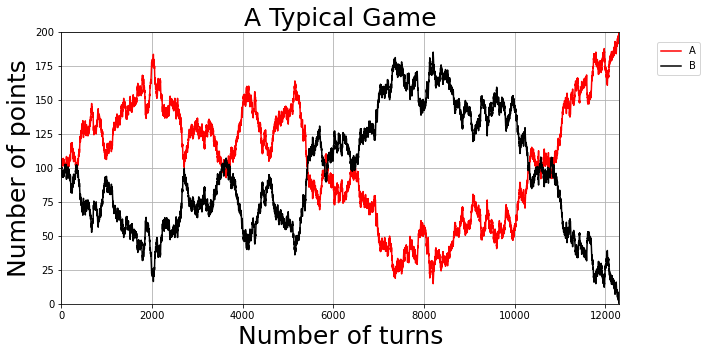

In [9]:
display(tab)

In [15]:
(21/36) / (15/36)

1.4000000000000001

In [16]:
21/15

1.4

The average number of rounds is 56.448
A wins 96.4 % of the time
B wins 3.6 % of the time


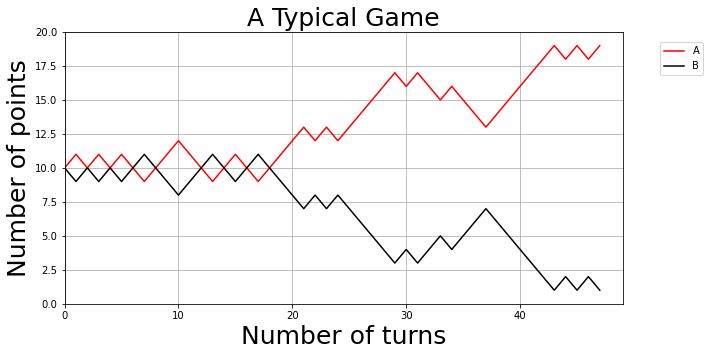

In [10]:
StartValue_A = all_the_widgets[0].value
StartValue_B = all_the_widgets[1].value
p = all_the_widgets[2].value
q = all_the_widgets[3].value
plot_game(StartValue_A, StartValue_B, p, q)

<h2 align='center'>What can we take away from this?</h2>

1. Notice slight advantages can significantly change the outcome when repeated over several iterations. 

2. The "losing party" can suffer in the quality of their experience, desire to continue engaging, emotional distress, tangible loss, and desire to disengage from the activity. 

3. The "winning" party , might believe that the outcome is solely due to their work ethic, talent, and might attritbute their success to themselves. 

4. How does this translate to real life?

<h2 align='center'>Implications in Real Life</h2>

1. In the context of work for example, how does being able to relate to your co-workers impact the opportunities you are given or even learn about? 

2. In the context of socio economic status, difficulty accessing resources results in higher likelyhood of suffering and thus less opportunities to thrive. 

3. Balancing things for all parties is a complex problem to solve, understanding of what drives inequality and what an appropriate solution is are needed before making changes.

<h2 align='center'>What can we do?</h2>

1. Acknowledge that there are advantages/disadvantages in life. These have an impact on overall success, and it is a constructive exercise to identify and address these. 

2. Acknowledge the role of advantage and be open to learning more about what can be done to balance things. 

3. It can be a deeply empowering experience to recognize the disadvantages and ask yourself what can be done with this knowledge. 

4. Work together to improve the situation, by adjusting the "parameters" in the situation.

5. Important to first identify the inherent problem and assessing how this impact parties involved. 

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h2 align='center'>Getting Started with Callysto</h2>

- Free, open source resources (CC license) callysto.ca
- Online self-paced courses (courses.callysto.ca)  
- Preview our learning modules https://callysto.github.io/curriculum-jbook/intro.html
- Contact us for “in-class” workshops, teacher PD, virtual hackathons, and more

Email: contact@callysto.ca

On Twitter: @callysto_canada